### Homework 5

이번 과제에서는 pandas datareader를 이용하여 주가 데이터를 이용해 실습을 한다

#### 1. 데이터 불러오기

아래 라이브러리를 활용하여 2020년 1월 1일부터 2023년 6월 31일까지의 어느 한 주식 종목의 데이터를 불러오라

In [1]:
import pandas_datareader as pdr
import datetime
import yfinance as yf

In [2]:
start_date = '2020-01-01'
end_date = '2023-07-01'

apple = yf.download('AAPL', start = start_date, end = end_date)
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249023,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536873,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114883,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941635,132079200
...,...,...,...,...,...,...
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.020157,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,187.806381,50730800
2023-06-28,187.929993,189.899994,187.600006,189.250000,188.994781,51216800


#### 2. AR model

준비된 데이터에 대해 AR모형의 차수를 결정하고 AR model을 적합화(fit)해 보자. 모형을 가장 잘 적합화하기 위해서는 차수를 어떻게 정해야 하는가?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [4]:
ret = np.log(apple.Close) - np.log(apple.Close.shift())
ret = ret.dropna()
ret

Date
2020-01-03   -0.009770
2020-01-06    0.007937
2020-01-07   -0.004714
2020-01-08    0.015958
2020-01-09    0.021018
                ...   
2023-06-26   -0.007582
2023-06-27    0.014947
2023-06-28    0.006308
2023-06-29    0.001795
2023-06-30    0.022840
Name: Close, Length: 879, dtype: float64

AR 차수 구하기

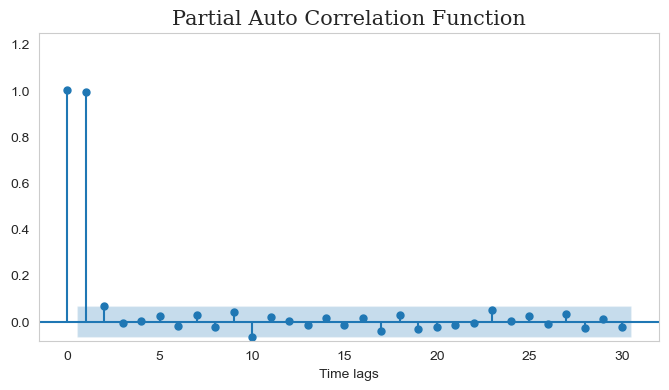

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(np.log(apple.Close), auto_ylims = True, lags = 30, title = 'PACF of Tesla log Index', ax = ax)
plt.grid(False)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

In [6]:
model = sm.tsa.ARIMA(np.log(apple.Close), order = (1,0,0), trend = 'c').fit(method = 'innovations_mle')
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  880
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2100.906
Date:                Wed, 13 Sep 2023   AIC                          -4195.813
Time:                        17:45:14   BIC                          -4181.473
Sample:                             0   HQIC                         -4190.329
                                - 880                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8283      0.258     18.708      0.000       4.322       5.334
ar.L1          0.9981      0.002    472.562      0.000       0.994       1.002
sigma2         0.0005    1.3e-05     37.637      0.0

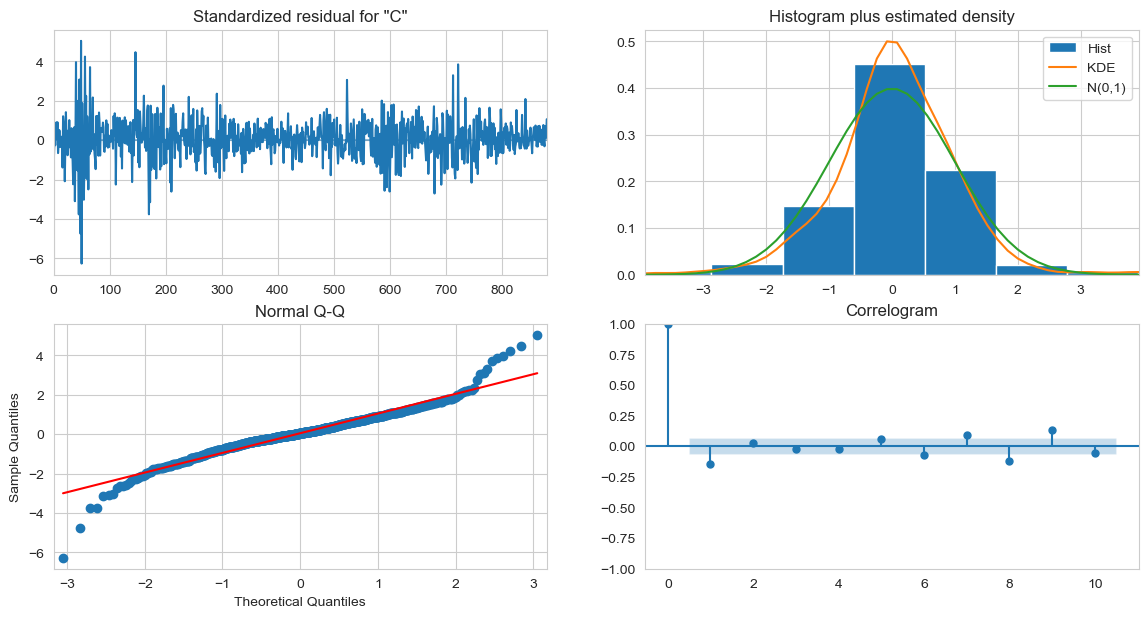

In [7]:
model.plot_diagnostics(figsize = (14,7))
plt.grid(False)
plt.show()

#### 3. MA model

준비된 데이터에 대해 MA모형의 차수를 결정하고 MA model을 적합화(fit)해 보자. 모형을 가장 잘 적합화하기 위해서는 차수를 어떻게 정해야 하는가? 그리고 MA model을 사용하기 위해서는 어떤 데이터를 사용해야 하는가?

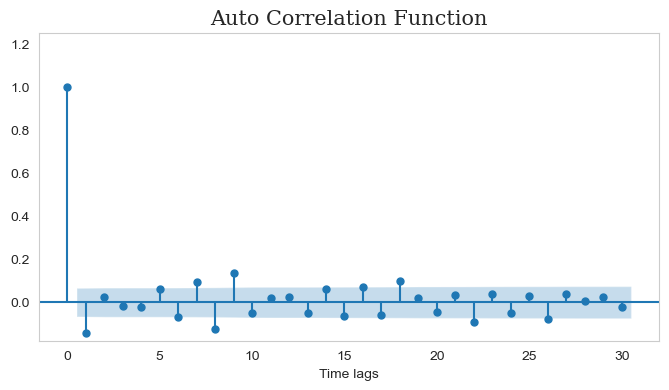

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(ret, auto_ylims = True, lags = 30, title = 'ACF of Tesla return' , ax = ax)
plt.grid(False)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

In [9]:
model = sm.tsa.ARIMA(ret, order = (0,0,1), trend = 'c').fit(method = 'innovations_mle')
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  879
Model:                 ARIMA(0, 0, 1)   Log Likelihood                2110.976
Date:                Wed, 13 Sep 2023   AIC                          -4215.951
Time:                        17:45:14   BIC                          -4201.615
Sample:                             0   HQIC                         -4210.469
                                - 879                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.671      0.095      -0.000       0.002
ma.L1         -0.1398      0.023     -5.997      0.000      -0.186      -0.094
sigma2         0.0005   1.44e-05     33.426      0.0

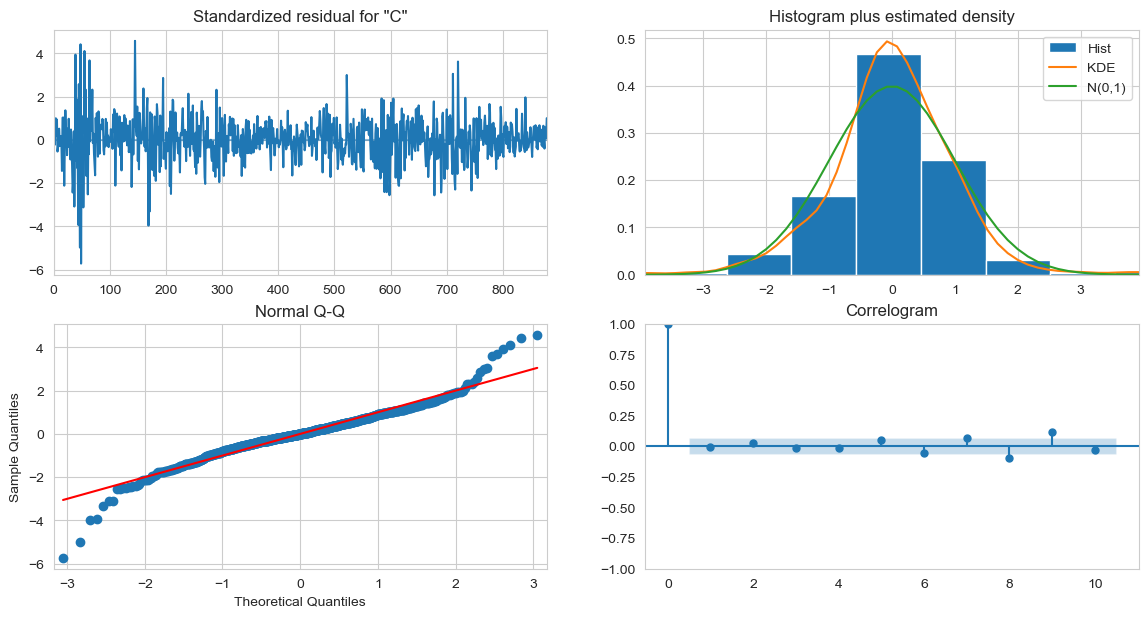

In [10]:
model.plot_diagnostics(figsize = (14,7))
plt.grid(False)
plt.show()

#### 4. ARMA model

준비된 데이터에 대해 ARMA모형의 차수(p,q)를 결정하고 ARMA model을 적합화(fit)해 보자. 모형을 가장 잘 적합화하기 위해서는 차수를 어떻게 정해야 하는가? 그리고 ARMA model을 사용하기 위해서는 어떤 데이터를 사용해야 하는가?

In [11]:
model = sm.tsa.ARIMA(np.log(apple.Close), order = (1,0,1), trend = 'c').fit(method = 'innovations_mle')
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  880
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2109.226
Date:                Wed, 13 Sep 2023   AIC                          -4210.452
Time:                        17:45:15   BIC                          -4191.333
Sample:                             0   HQIC                         -4203.141
                                - 880                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8191      0.298     16.161      0.000       4.235       5.404
ar.L1          0.9988      0.002    535.519      0.000       0.995       1.002
ma.L1         -0.1353      0.024     -5.745      0.0

Text(0.5, 1.0, 'Residual vs. Normal')

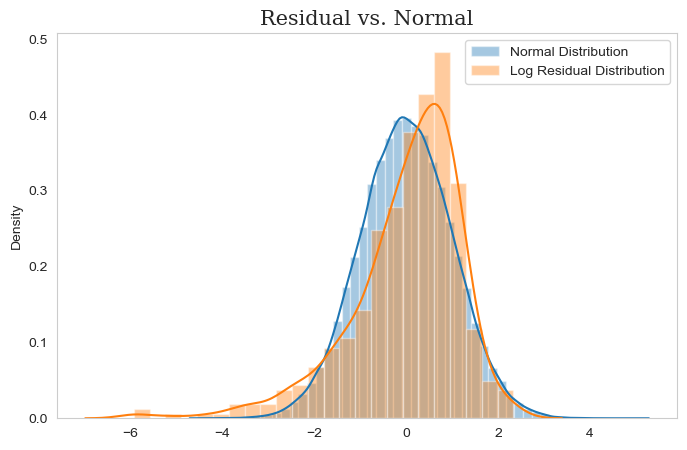

In [12]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(np.random.normal(size=100000), kde = True, ax = ax1, label = 'Normal Distribution')
sns.distplot(np.log(model.resid) - np.log(model.resid).mean() ,
             kde = True, rug = False , ax = ax1, label = 'Log Residual Distribution')
plt.grid(False)
plt.legend()
plt.title('Residual vs. Normal', fontsize = 15, fontfamily = 'Serif')

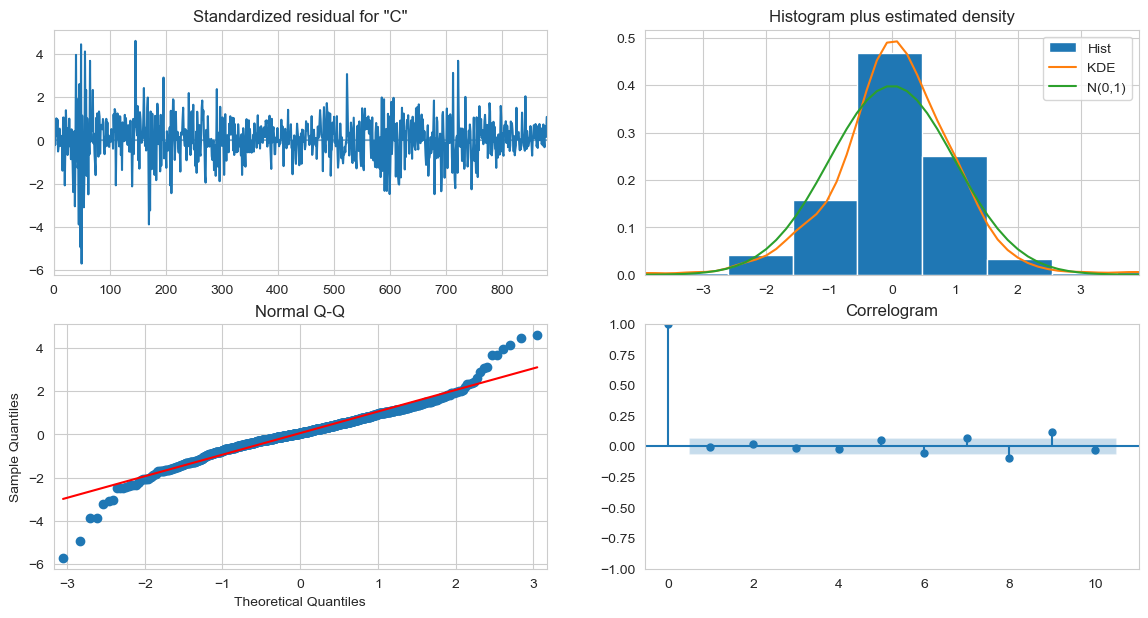

In [13]:
model.plot_diagnostics(figsize = (14,7))
plt.grid(False)
plt.show()

#### 5. Prediction

1~4번을 통해 구한 모형으로부터 20기간 예측을 실행하라. 어떤 결과값이 나오는가? 실제값과 비교하였을 때, 예측은 정확한가? 추정된 값은 효율적인 추정량이고, 최소 예측 분산을 가지고 있는가?

In [14]:
forecast_steps = 20
model.forecast(steps = forecast_steps)

880    5.263923
881    5.263374
882    5.262826
883    5.262278
884    5.261731
885    5.261185
886    5.260640
887    5.260095
888    5.259550
889    5.259007
890    5.258464
891    5.257922
892    5.257380
893    5.256839
894    5.256299
895    5.255759
896    5.255220
897    5.254682
898    5.254145
899    5.253608
Name: predicted_mean, dtype: float64

In [15]:
start_date = '2023-06-30'
end_date = '2023-07-30'

apple_new = yf.download('AAPL', start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


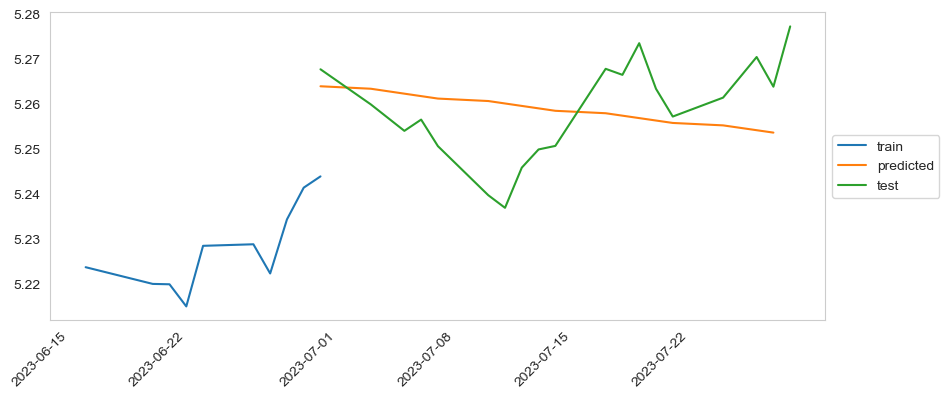

In [16]:
import pandas as pd
plt.figure(figsize = (10,4))
plt.plot(model.fittedvalues[-10:], label = 'train')
plt.plot(pd.date_range(start = '2023-06-30', periods = forecast_steps, freq='B'),
         model.forecast(steps = forecast_steps), label = 'predicted')
plt.plot(np.log(apple_new.Close), label = 'test')
plt.grid(False)
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

#### 6. Recurrent Neural Network

<center><img src = "https://images.velog.io/images/yuns_u/post/ccbb28ea-fa08-4d23-804e-419e6f578e4b/image.png" alt="My Image"></center>

**RNN(Recurrent Neural Network)** 은 딥러닝 기법 중 하나로, 시퀀스 데이터를 처리하는 데 특화된 인공신경망 구조이다. 자연어 처리, 음성 인식, 시계열 데이터 등 다양한 시퀀스 데이터에 대한 분석과 예측에 매우 유용하게 사용된다고 알려져 있다. RNN에 관한 자세한 내용은 아래 링크를 통해 익히도록 하자

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html

1개의 hidden layer, $H=1$, activation function은 없고 입력 벡터의 차원 $P=1$인 간단한 경우의 $\mbox{RNN}$을 추가로 고려하자. 추가로 $W_z^{(1)} = \phi_z$, $|\phi_z|<1$, $W_x^{(1)} = \phi_x$, $W_y = 1$, $b_h = 0$, $b_y = \mu$를 가정하자. 그러면 $f_{W^{(1)},b^{(1)}}^{(1)}(\chi_t)$가 자기회귀 계수가 기하급수적으로 감쇠하는, 즉 $\phi_i = \phi_x \phi_z^{i-1}$인 $p$차의 자기회귀 $\mbox{AR}(p)$모델임을 보일 수 있다

$$z_{t-p} = \phi_x x_{t-p}$$
$$z_{t-T+2} = \phi_z z_{t-T+1} + \phi_x x_{x-T+2}$$
$$\cdots = \cdots$$
$$z_{t-1} = \phi_z z_{t-2} + \phi_x x_{t-1}$$
$$\hat x_t = z_{t-1} + \mu$$

위 조건에서 다음이 성립한다

$$\hat x_t = \mu + \phi_x(L + \phi_z L^2 + \cdots + \phi_z^{p-1} L^p)[x_t] = \mu + \sum_{i=1} \phi_i x_{t-i}$$

위 조건을 참고하여, 아래 라이브러리를 사용하여 Activation function을 사용하지 않고 은닉층이 한 개인 간단한 RNN모형을 사용하여 2번의 과정을 다시 반복하라.

In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.regularizers import l1, l2

scaling

In [18]:
min_val = np.min(apple.Close)
max_val = np.max(apple.Close)
scaled_data = (apple.Close - min_val) / (max_val - min_val)

In [19]:
X = scaled_data[1:]
y = scaled_data.shift(1).dropna()

train - test split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

Simple RNN models

In [26]:
model = Sequential()
model.add(SimpleRNN(units = 1, 
                    input_shape = (X_train.shape[0], 1), 
                    kernel_regularizer = l1(0), 
                    unroll = True, 
                    stateful = False,
                    activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [28]:
predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)

6/6 [==============================] - 0s 548us/step


In [29]:
test = pd.Series(predicted_test.reshape(-1), index = X_test.index)

Text(0.5, 1.0, 'AR model prediction with simple RNN')

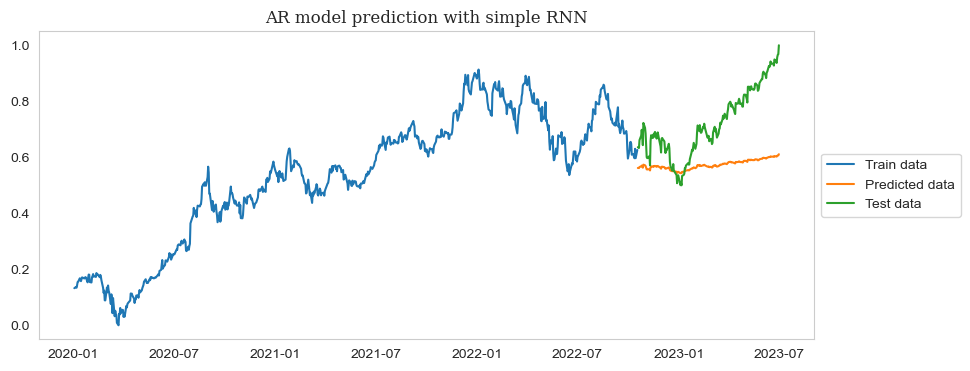

In [30]:
plt.figure(figsize = (10, 4))
plt.plot(X_train, label = 'Train data')
plt.plot(test, label = 'Predicted data')
plt.plot(X_test, label = 'Test data')
plt.grid(False)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('AR model prediction with simple RNN', fontsize = 12, fontfamily = 'Serif')